In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [16]:
PM25_file_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv"
PM25 = pd.read_csv(PM25_file_path)
PM25.head()
PM25.shape

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


(43824, 13)

In [17]:
PM25_notna = PM25.loc[pd.notna(PM25['pm2.5'])]
PM25_notna.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


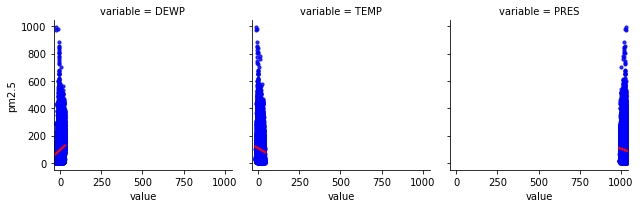

In [18]:
PM25_grid = pd.melt(PM25, id_vars = "pm2.5", value_vars = ["DEWP", "TEMP", "PRES"])
g = sns.FacetGrid(PM25_grid, col="variable")
g.map(sns.regplot, "value", "pm2.5", ci = 95, scatter_kws = {"color": "blue", 's': 10}, line_kws = {"color": "red"})

<AxesSubplot:xlabel='DEWP', ylabel='pm2.5'>

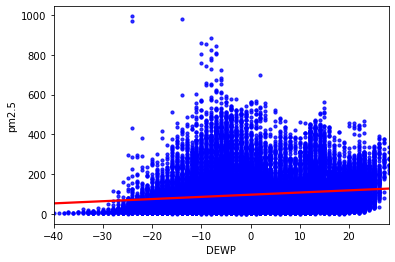

In [19]:
sns.regplot(data = PM25_notna, x = "DEWP", y = "pm2.5",
ci = 95, scatter_kws = {"color": "blue", 's': 10}, 
line_kws = {"color": "red"})

<AxesSubplot:xlabel='TEMP', ylabel='pm2.5'>

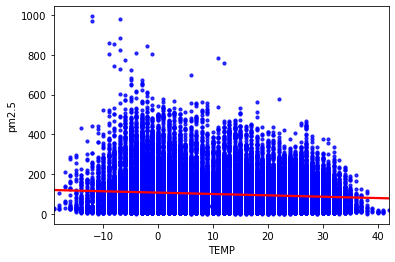

In [20]:
sns.regplot(data = PM25_notna, x = "TEMP", y = "pm2.5",
ci = 95, scatter_kws = {"color": "blue", 's': 10}, 
line_kws = {"color": "red"})

<AxesSubplot:xlabel='PRES', ylabel='pm2.5'>

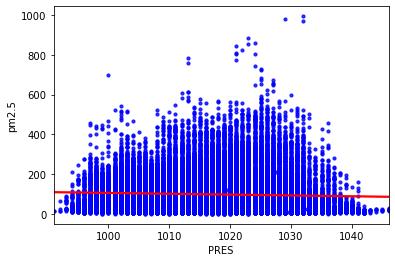

In [21]:
sns.regplot(data = PM25_notna, x = "PRES", y = "pm2.5",
ci = 95, scatter_kws = {"color": "blue", 's': 10}, 
line_kws = {"color": "red"})

In [22]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [23]:
# Creamos X e y
Xd = PM25_notna[['DEWP']]
Xt = PM25_notna[['TEMP']]
Xp = PM25_notna[['PRES']]
y = PM25_notna['pm2.5']

In [24]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd, y, random_state = 1)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, random_state = 1)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y, random_state = 1)

In [25]:
model.fit(Xd_train, yd_train)
model.coef_
model.intercept_
test_sklearn_d = np.array(Xd_test).reshape(-1,1)
model.predict(test_sklearn_d)
yd_pred = model.predict(Xd_test)

LinearRegression()

array([1.0958696])

96.98466425887538

array([ 84.93009868, 104.65575145,  88.21770747, ..., 115.61444743,
        81.64248988, 110.13509944])

In [26]:
model.fit(Xt_train, yt_train)
model.coef_
model.intercept_
test_sklearn_t = np.array(Xt_test).reshape(-1,1)
model.predict(test_sklearn_t)
yt_pred = model.predict(Xt_test)

LinearRegression()

array([-0.6992465])

107.5545378182826

array([110.35152382,  97.76508682,  97.06584032, ...,  85.87789631,
       108.25378432,  87.27638931])

In [27]:
model.fit(Xp_train, yp_train)
model.coef_
model.intercept_
test_sklearn_p = np.array(Xp_test).reshape(-1,1)
model.predict(test_sklearn_p)
yp_pred = model.predict(Xp_test)

LinearRegression()

array([-0.42023227])

526.0257626522421

array([ 99.49000997, 104.5327972 ,  94.44722275, ..., 104.5327972 ,
        94.02699048, 103.27210039])

In [28]:
print (f'''MAE_dewp\t{mean_absolute_error(yd_test, yd_pred).round(2)}
MSE_dewp\t{mean_squared_error(yd_test, yd_pred).round(2)}
RMSE_dewp\t{np.sqrt(mean_squared_error(yd_test, yd_pred)).round(2)}
R2_dewp\t\t{r2_score(yd_test, yd_pred).round(2)}

MAE_temp\t{mean_absolute_error(yt_test, yt_pred).round(2)}
MSE_temp\t{mean_squared_error(yt_test, yt_pred).round(2)}
RMSE_temp\t{np.sqrt(mean_squared_error(yt_test, yt_pred)).round(2)}
R2_temp\t\t{r2_score(yt_test, yt_pred).round(2)}

MAE_pres\t{mean_absolute_error(yp_test, yp_pred).round(2)}
MSE_pres\t{mean_squared_error(yp_test, yp_pred).round(2)}
RMSE_pres\t{np.sqrt(mean_squared_error(yp_test, yp_pred)).round(2)}
R2_pres\t\t{r2_score(yp_test, yp_pred).round(2)}''')

MAE_dewp	66.06
MSE_dewp	7957.86
RMSE_dewp	89.21
R2_dewp		0.03

MAE_temp	68.44
MSE_temp	8143.11
RMSE_temp	90.24
R2_temp		0.01

MAE_pres	67.91
MSE_pres	8183.59
RMSE_pres	90.46
R2_pres		0.0
